In [1]:
import deorbit
import numpy as np
import matplotlib.pyplot as plt

In [2]:
sim = deorbit.simulator.run(
    "RK4",
    "coesa_atmos_fast",
    initial_state=np.array((deorbit.constants.EARTH_RADIUS + 180000, 0, 0, 7800)),
    time_step=2,
)

print(type(sim))

Running simulation with RK4 integrator
Ran 65303 iterations at time step of 2.0 seconds
Impacted at [ 1618563.46764597 -6161905.65537518] at velocity [436.80657146 165.86231276] at simulated time 130606.0s.
Simulation finished in 12.49833 seconds
<class 'deorbit.simulator.simulator.RK4Simulator'>


In [3]:
save_path = sim.save_data("eg/", format="pkl")

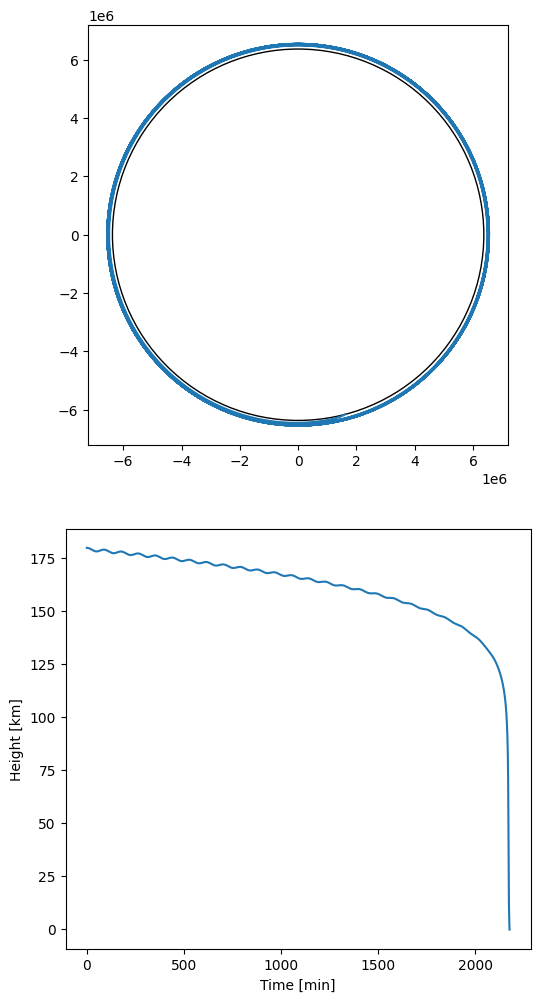

In [4]:
fig, ax = plt.subplots(2,1)
fig.set_figheight(12)
fig.set_figwidth(6)
states = np.array(sim.states)
ax[0].plot(states[:, 0], states[:, 1])
earth = plt.Circle((0, 0), radius=deorbit.constants.EARTH_RADIUS, fill=False)
ax[0].add_patch(earth)
ax[0].axis("scaled")
ax[1].plot(np.array(sim.times) / 60, (np.linalg.norm(states[:, :2], axis=1) - deorbit.constants.EARTH_RADIUS)/1000)
ax[1].set_ylabel("Height [km]")
ax[1].set_xlabel("Time [min]")
plt.show()

In [5]:
from deorbit.utils import dataio
from deorbit.data_models.sim import SimConfig

sim_config: SimConfig = dataio.load_sim_config(save_path)
sim_config

SimConfig(initial_state=[6551000.0, 0.0, 0.0, 7800.0], initial_time=0.0, simulation_method_kwargs=RK4Kwargs(dimension=2, time_step=2.0, noise_types={}), atmosphere_model_kwargs=CoesaFastKwargs(earth_radius=6371000, earth_angular_velocity=7.2921159e-05, precision=2))